# <span style='color:#0D2BA5'>Projet 4 - Anticipez les besoins en consommation de bâtiments : Prédiction Consommation</span>
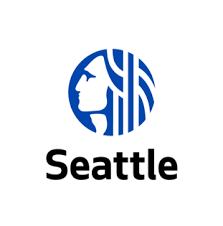

## <span style='background:#33B5FF'>Table des Matieres</span>

In [123]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### <span style='background:#33B5FF'>1. Introduction</span>



**Mission**
*****
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.




**Source**
*****
Le jeux de donnée est disponible à l'adresse : [Seatlle Data](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv)
*****



**Axes d'orientations**
*****

Nous allons :
- Tester différents modèles de prédiction pour le **Consommation**.
- Mettre en place une évaluation rigoureuse des performances, et optimiser les hyperparamètres et le choix d’algorithmes de ML à l’aide d’une validation croisée. 
- Tester au minimum 4 algorithmes de famille différente (par exemple : ElasticNet, SVM, GradientBoosting, XGBoost, RandomForest).
- Evaluer, pour ces prédictions, la pertinence d'un indicateur d'efficacité énergétique appelé **Energy Star Score**.
- **Conclusions**


## <span style='background:#33B5FF'>2. Bibliothèques d'analyse Python</span>

In [124]:
#Cet environnement Python 3 est livré avec de nombreuses bibliothèques d'analyse utiles installées
#Par exemple, voici plusieurs packages utiles à charger

import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, E/S de fichier CSV (par exemple pd.read_csv)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Chargement des librairies
import datetime
import jyquickhelper
import numpy as np
import pandas as pd
import sys
from math import sqrt
import pickle
from pprint import pprint
import time

    
import matplotlib.pyplot as plt #Visualisations graphiques des données
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
#!pip3 install plotly #installer plotly
import plotly.express as px 

# Modélisation
from sklearn import tree

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.preprocessing import OneHotEncoder #pour le recodage des variables catégorielles 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.patches as mpatches
import collections
import folium
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi
from scipy.stats import pearsonr


from sklearn.impute import KNNImputer
from sklearn.datasets import make_regression, make_circles
from scipy.stats import kendalltau, spearmanr
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances


# Data pré-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from category_encoders import LeaveOneOutEncoder, TargetEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn import decomposition, preprocessing
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, \
    ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor, \
    StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#from missingpy import MissForest

import json
import ast

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
    explained_variance_score, median_absolute_error


# Versions de quelques librairies 
print('Version de quelques librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
#print('Matplotlib    : ' + plt.__version__)
print('Seaborn    : ' + sns.__version__)
#print('Plotly    : ' + px.__version__)

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le : ' + now)

Version de quelques librairies utilisées :
Python        : 3.11.3 (main, Apr  7 2023, 19:25:52) [Clang 14.0.0 (clang-1400.0.29.202)]
NumPy         : 1.24.3
Pandas        : 2.0.1
Seaborn    : 0.12.2
Lancé le : 2023-09-24T20:48:45.513546


In [125]:
def Regression(model_reg,X_train,X_test,y_train,y_test,df_resultats,titre):
    
    """
    Lance un modele de régression et sauvegarde les
    performances
    Parameters
    ----------
    model_reg : modèle de régression initialisé, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les traces, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle
    model_reg.fit(X_train, y_train)
    
    # Prédictions avec le test set
    y_pred = model_reg.predict(X_test)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    # une mesure qui indique la performance du modèle
    r2 = r2_score(y_test,y_pred)
    #MAE est une mesure très simple qui calcule la différence absolue entre les valeurs réelles et prédites.
    mae = mean_absolute_error(y_test, y_pred)
    #Il représente la distance au carré entre les valeurs réelles et les valeurs prédites. Nous effectuons le carré pour éviter l'annulation des termes négatifs et c'est l'avantage de MSE.
    mse = mean_squared_error(y_test, y_pred)
    #racine carrée d'erreur quadratile moyenne.
    rmse = sqrt(mse)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape

    # durée d'exécution
    time_execution = time_end - time_start
    
    # cross validation
    scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(model_reg, X_train, y_train, cv=10,
                            scoring=scoring, return_train_score=True)


    # Sauvegarde des performances
    df_resultats = df_resultats._append(pd.DataFrame({
         'Modèle': [titre],
         'R2': [r2],
         'MSE': [mse],
         'RMSE': [rmse],
         'MAE': [mae],
         'Erreur moy': [np.mean(errors)],
         'Précision': [accuracy],
         'Durée': [time_execution],
         'Test R2 CV': [scores['test_r2'].mean()],
         'Test R2 +/-': [scores['test_r2'].std()],
         'Test MSE CV': [-(scores['test_neg_mean_squared_error'].mean())],
         'Train R2 CV': [scores['train_r2'].mean()],
         'Train R2 +/-': [scores['train_r2'].std()],
         'Train MSE CV': [-(scores['train_neg_mean_squared_error'].mean())]
     }), ignore_index=True)
    #Affiche tableau
    display(df_resultats)

    return df_resultats, y_pred

In [126]:
def affiche_erreur(y_test, y_pred,titre):
    """
    affiche_erreur : booleen affiche le graphique des erreurs.
    """
    # retour aux valeurs d'origine
    test = (10 ** y_test) + 1
    predict = (10 ** y_pred) + 1
    # affichage des erreurs
    df_res = pd.DataFrame({'true': test, 'pred': predict})
    df_res = df_res.sort_values('true')

    plt.plot(df_res['pred'].values, label='pred')
    plt.plot(df_res['true'].values, label='true')
    plt.xlabel('Test set')
    plt.ylabel("Consommation energie totale")
    plt.suptitle(t='Erreurs pour : '
                 + str(titre),
                 y=0,
                 fontsize=16,
                 alpha=0.75,
                 weight='bold',
                 ha='center')
    plt.legend()
    plt.show()

## <span style='background:#33B5FF'>3. Chargement du jeux de données </span>

In [127]:
# Chargement du jeu de données prédédemment nettoyé
data = pd.read_csv('dfBat_nettoye.csv')

In [128]:
#Afficher les 5 premieres lignes
data.head()

,Unnamed: 0,SiteEnergyUseWN(kBtu),SiteEnergyUseWNLog,TotalGHGEmissions,TotalGHGEmissionsLog,ENERGYSTARScore,BuildingType,CouncilDistrictCode,Neighborhood,NumberofBuildings,...,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Latitude,Longitude,Nb_utilisation,BuildingAge,TauxFirstUseGFA,TauxSecondtUseGFA,TauxParkingGFA
0,0,7456910.0,6.872559,249.98,2.399639,60.0,NonResidential,7,DOWNTOWN,1.0,...,2003882.00,3946027.0,1276453.0,47.61220,-122.33799,1,89,1.000000,0.000000,0.000000
1,1,8664479.0,6.937743,295.86,2.472552,61.0,NonResidential,7,DOWNTOWN,1.0,...,0.00,3242851.0,5145082.0,47.61317,-122.33393,3,20,0.809918,0.145453,0.145453
2,2,73937112.0,7.868862,2089.28,3.320204,43.0,NonResidential,7,DOWNTOWN,1.0,...,21566554.00,49526664.0,1493800.0,47.61393,-122.33810,1,47,0.791220,0.000000,0.205748
3,3,6946800.5,6.841785,286.43,2.458532,56.0,NonResidential,7,DOWNTOWN,1.0,...,2214446.25,2768924.0,1811213.0,47.61412,-122.33664,1,90,1.000000,0.000000,0.000000
4,4,14656503.0,7.166030,505.01,2.704159,75.0,NonResidential,7,DOWNTOWN,1.0,...,0.00,5368607.0,8803998.0,47.61375,-122.34047,3,36,0.703070,0.387339,0.353115


In [129]:
# Copie du jeu de données dans un dataframe témoin
data_copy = data.copy()
data_copy.drop(columns = ['Unnamed: 0'],inplace = True)

In [130]:
data_copy.dtypes

SiteEnergyUseWN(kBtu)     float64
SiteEnergyUseWNLog        float64
TotalGHGEmissions         float64
TotalGHGEmissionsLog      float64
ENERGYSTARScore           float64
BuildingType               object
CouncilDistrictCode         int64
Neighborhood               object
NumberofBuildings         float64
NumberofFloors              int64
PropertyGFABuilding(s)      int64
PrimaryPropertyType        object
LargestPropertyUseType     object
SteamUse(kBtu)            float64
Electricity(kBtu)         float64
NaturalGas(kBtu)          float64
Latitude                  float64
Longitude                 float64
Nb_utilisation              int64
BuildingAge                 int64
TauxFirstUseGFA           float64
TauxSecondtUseGFA         float64
TauxParkingGFA            float64
dtype: object

In [131]:
# NumberofBuildings passer de float64 à int64
data_copy['NumberofBuildings'] = data_copy['NumberofBuildings'].astype('int64')

In [132]:
#Descriptions des données 
data_copy.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SiteEnergyUseWN(kBtu),1665.0,NaN,NaN,NaN,8064790.437557,22038776.263278,0.0,1294615.25,2685146.5,7109712.5,471613856.0
SiteEnergyUseWNLog,1665.0,NaN,NaN,NaN,6.399457,0.969101,0.0,6.112141,6.428968,6.851852,8.673587
TotalGHGEmissions,1665.0,NaN,NaN,NaN,185.018835,752.199624,-0.8,19.93,49.58,142.39,16870.98
TotalGHGEmissionsLog,1665.0,NaN,NaN,NaN,1.729987,0.639639,-0.69897,1.320769,1.703979,2.156519,4.227166
ENERGYSTARScore,1093.0,NaN,NaN,NaN,65.42452,28.493766,1.0,48.0,73.0,89.0,100.0
BuildingType,1665,5,NonResidential,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CouncilDistrictCode,1665.0,NaN,NaN,NaN,4.353754,2.191088,1.0,2.0,4.0,7.0,7.0
Neighborhood,1665,19,DOWNTOWN,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberofBuildings,1665.0,NaN,NaN,NaN,1.2,2.924984,1.0,1.0,1.0,1.0,111.0
NumberofFloors,1665.0,NaN,NaN,NaN,4.062462,6.1431,0.0,1.0,2.0,4.0,76.0


## <span style='background:#33B5FF'>4. Préparation des données </span>
Préparation des données pour les rendre applicables aux modèles de machine learning :

### <span style='color'>4.1 Préparation de la Matrice X et du Vecteur y</span>
sépartion des données en entrées (matrice X) et de la variable cible (vecteur y).

In [133]:
# Suppression de la variable 'ENERGYSTARScore' à étudier pour l'émission de Co2
cols_energystar = 'ENERGYSTARScore'
# Suppression de cette variable du dataframe à modéliser
data_copy.drop([cols_energystar], axis=1, inplace=True)

**Les variables catégorielles**

In [134]:
# Variables qualitatives
cols_cat = data_copy.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['BuildingType',
 'Neighborhood',
 'PrimaryPropertyType',
 'LargestPropertyUseType']

In [135]:
# Variables cibles
cols_target = data_copy.columns[0:4].to_list()
cols_target

['SiteEnergyUseWN(kBtu)',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions',
 'TotalGHGEmissionsLog']

In [136]:
# Variables quantitatives
cols_num = data_copy.select_dtypes(include=[np.number]).columns.to_list()
# Suppression des variables cibles
del cols_num[0:4]
cols_num

['CouncilDistrictCode',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Latitude',
 'Longitude',
 'Nb_utilisation',
 'BuildingAge',
 'TauxFirstUseGFA',
 'TauxSecondtUseGFA',
 'TauxParkingGFA']

**Matrice X**

In [137]:
# Matrice X
X = data_copy[cols_cat+cols_num]
X.shape

(1665, 18)

**Vecteur y**

**Remarque** : nous avons deux cibles celui transformé en logarithme et sans, nous allons séparé les deux 

In [138]:
# Analyse de la target 'SiteEnergyUseWN' non transformée
y = data_copy['SiteEnergyUseWN(kBtu)']
y.shape

(1665,)

In [139]:
# Analyse de la target 'SiteEnergyUseWN' transformée
y_log = data_copy['SiteEnergyUseWNLog']
y_log.shape

(1665,)

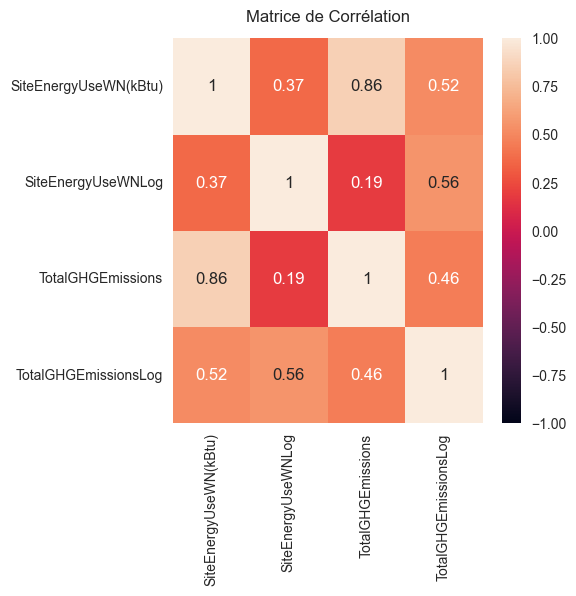

In [140]:

# Matrice de corrélation entre les targets
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(data_copy[cols_target].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Matrice de Corrélation', fontdict={'fontsize':12}, pad=12);


### <span style='color'>4.2  Découpage du jeu de données en train set et test set</span>

**Cible SiteEnergyUseWN non transformée**

In [141]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state = 1066)
print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} - y_test : {y_test.shape}')

X_train : (1332, 18) - X_test : (333, 18)
y_train : (1332,) - y_test : (333,)


**Cible SiteEnergyUseWN  transformée**

In [142]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.20,random_state = 1066)
print(f'X_train_log : {X_train_log.shape} - X_test_log : {X_test_log.shape}')
print(f'y_train_log : {y_train_log.shape} - y_test_log : {y_test_log.shape}')

X_train_log : (1332, 18) - X_test_log : (333, 18)
y_train_log : (1332,) - y_test_log : (333,)


### <span style='color'>4.3  Encodage des variables qualitatives</span>

**TargetEncoder()**

In [143]:
# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données de consommation d'énergie non transformée en log10
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)


In [144]:
# Encodage des données de consommation d'énergie transformée en log10
target_encoder = TargetEncoder()
X_train_log= target_encoder.fit_transform(
    X_train_log, y_train_log)
X_test_log = target_encoder.transform(X_test_log)


### <span style='color'>4.4. Standardisation des variables quantitatives</span>

**RobustScaler()**

In [145]:
# RobustScaler
scaler_rob = RobustScaler()

# Jeu de la target de consommation d'énergie non transformée en log10
X_train[cols_num] = scaler_rob.fit_transform(X_train[cols_num].copy(deep=True))
X_test[cols_num] = scaler_rob.transform(X_test[cols_num].copy(deep=True))


In [146]:
# Jeu de la target de consommation d'énergie transformée en log10
scaler_rob = RobustScaler()
X_train_log[cols_num] = scaler_rob.fit_transform(
    X_train_log[cols_num].copy(deep=True))
X_test_log[cols_num] = scaler_rob.transform(
    X_test_log[cols_num].copy(deep=True))


## <span style='background:#33B5FF'>5. Tester différents algorithmes de Machine Learning </span>

In [147]:
# Création d'un dataframe stockant les résultats des différents algorithmes
df_resultats = pd.DataFrame(dtype='object')

### <span style='color'>5.1. Modele Baseline </span>

#### <span style='color'>5.1.1 DummyRegressor : mean </span>

**Cible SiteEnergyUseWN non transformée**

In [148]:
from sklearn.dummy import DummyRegressor
df_resultats, y_pred = Regression(DummyRegressor(strategy='mean'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_mean')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.0,0.0,5.261023e+14


**Cible SiteEnergyUseWN transformée**

In [149]:
df_resultats, y_pred_d_l = Regression(DummyRegressor(strategy='mean'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_meanlog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.0,0.0,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.0,0.0,8.845235e-01


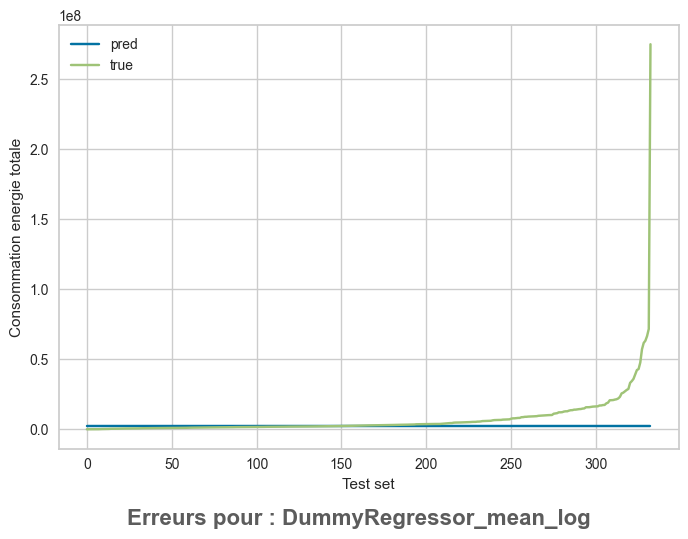

In [150]:
affiche_erreur(y_test_log,y_pred_d_l,'DummyRegressor_mean_log')

#### <span style='color'>5.1.2 DummyRegressor : median </span>

**Cible SiteEnergyUseWN non transformée**

In [151]:
df_resultats, y_pred = Regression(DummyRegressor(strategy='median'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_median')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14


**Cible SiteEnergyUseWN transformée**

In [152]:
df_resultats, y_pred_d_log = Regression(DummyRegressor(strategy='median'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_medianlog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01


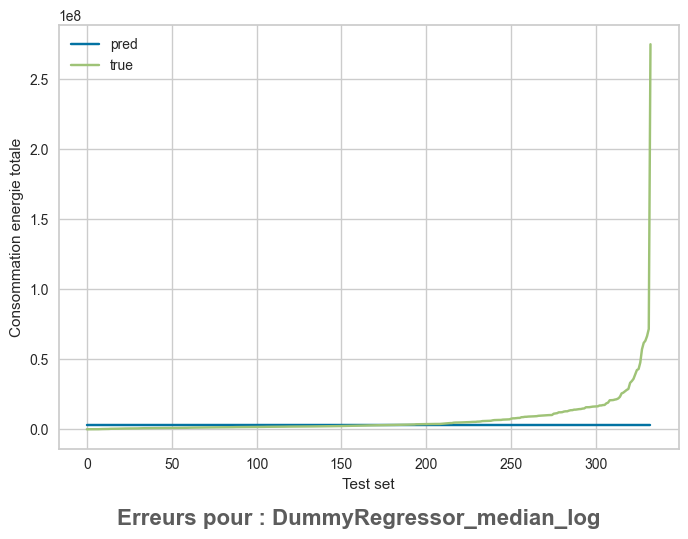

In [153]:
affiche_erreur(y_test_log,y_pred_d_log,'DummyRegressor_median_log')

### <span style='color'>5.2. Modeles Lineaires </span>

#### <span style='color'>5.2.1 LASSO </span>

**Cible SiteEnergyUseWN non transformée**

In [154]:
from sklearn.linear_model import Lasso
df_resultats, y_pred = Regression(Lasso(), X_train, X_test, y_train,y_test,df_resultats,'Lasso')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13


**Importances des features avec yellowbrick**

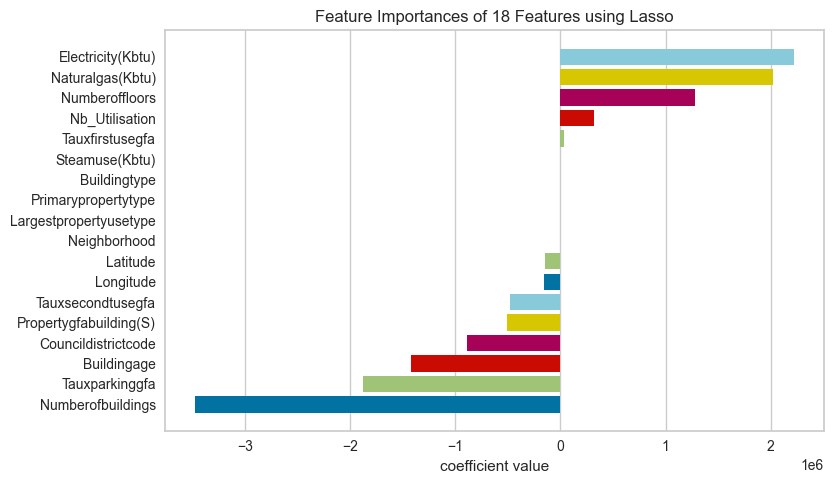

<Axes: title={'center': 'Feature Importances of 18 Features using Lasso'}, xlabel='coefficient value'>

In [155]:
lasso_reg =Lasso()
lasso_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible SiteEnergyUseWN  transformée**

In [156]:
df_resultats, y_pred_l_log = Regression(Lasso(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'Lasso_log')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01


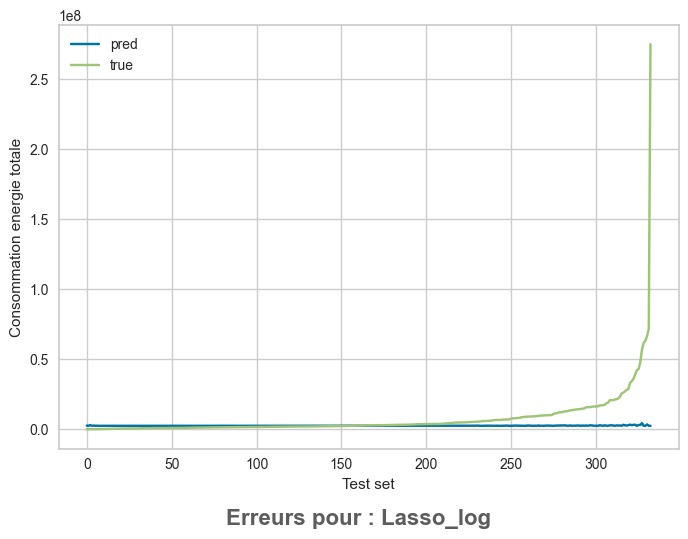

In [157]:
affiche_erreur(y_test_log,y_pred_l_log,'Lasso_log')

**Note** : 
- Algorithme des moindres carrés ordinaires avec ajout d'un terme de régularisation L1. Le poids du terme de régularisation est contrôlé par un argument alpha supplémentaire. Le poids du terme MCO est inversement proportionnel au nombre d'échantillons.
- Utilisation ? :
  - Seules quelques caractéristiques sont importantes, sélection des caractéristiques.
  - Les données sont composées de quelques valeurs aberrantes.
  - Il peut y avoir une certaine corrélation entre les caractéristiques d'entrée.
  - Vous souhaitez donner plus de poids à quelques caractéristiques importantes et ne pas ignorer les caractéristiques moins importantes.
- Avantages :
  - Réduit le nombre de caractéristiques que le modèle utilise.
  - Peut gérer de grandes quantités de caractéristiques.
  - Peut souvent être utilisé comme un test préliminaire pour effectuer une sélection de caractéristiques!
- Inconvénients :
  - En réduisant la variance, incorpore un certain degré de biais dans le modèle.
  - Il peut être difficile de régler alpha pour atteindre un équilibre souhaitable entre les MCO et le terme de régularisation.

#### <span style='color'>5.2.2 LinearRegression</span>

**Cible SiteEnergyUseWN non transformée**

In [158]:
from sklearn.linear_model import LinearRegression
df_resultats, y_pred_reg = Regression(LinearRegression(), X_train, X_test, y_train, y_test, df_resultats,'LinearRegression')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13


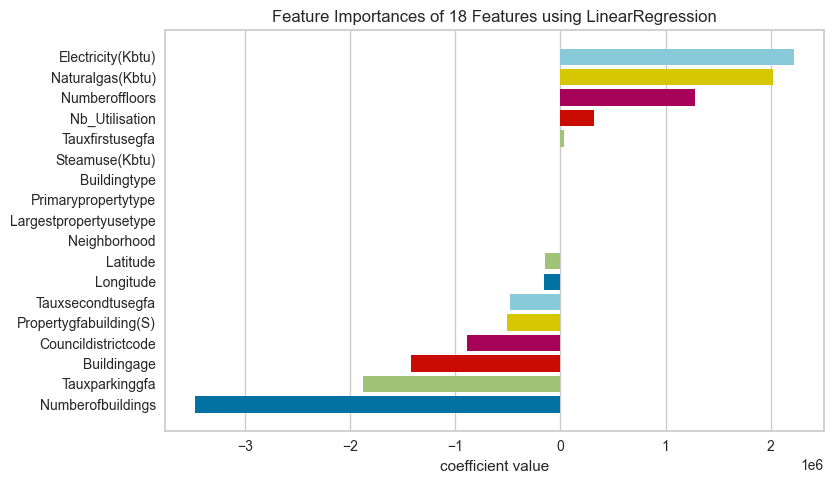

<Axes: title={'center': 'Feature Importances of 18 Features using LinearRegression'}, xlabel='coefficient value'>

In [160]:
lin_reg =LinearRegression()
lin_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lin_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

'**Cible SiteEnergyUseWN  transformée**

In [161]:
df_resultats, y_pred = Regression(LinearRegression(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'LinearRegressionLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01


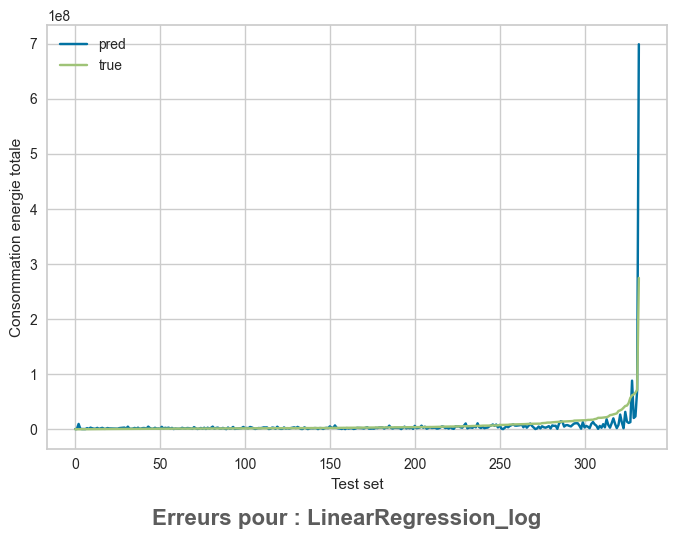

In [162]:
affiche_erreur(y_test_log,y_pred,'LinearRegression_log')

- Algorithme des moindres carrés ordinaires est utilisé car il est hautement interprétable, aucun biais introduit, les données sont composées de peu de valeurs aberrantes. La variance entre les étiquettes de sortie est faible. Toutes les caractéristiques d'entrée sont non seulement indépendantes mais aussi non corrélées.
- Il a l'avantage de faciliter l'interprétation des résultats et il a un faible niveau de complexité.
- Inconvénients : Risque de multicolinéarité si les caractéristiques d'entrée sont corrélées. De petites erreurs ou valeurs aberrantes dans les valeurs cibles peuvent avoir un impact considérable sur le modèle.

#### <span style='color'>5.2.3 ElasticNet</span>

**Cible SiteEnergyUseWN non transformée**

In [163]:
from sklearn.linear_model import ElasticNet
df_resultats, y_pred = Regression(ElasticNet(random_state=1066), X_train, X_test, y_train,y_test,df_resultats,'ElasticNet')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13


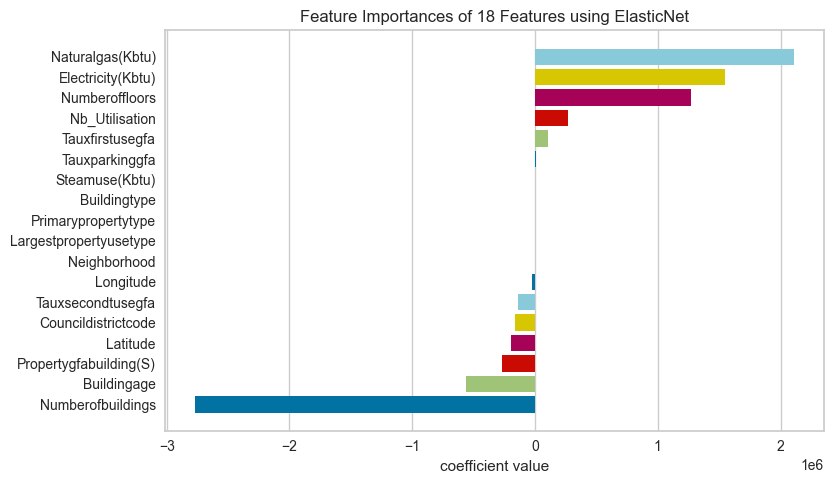

<Axes: title={'center': 'Feature Importances of 18 Features using ElasticNet'}, xlabel='coefficient value'>

In [164]:
ela_reg =ElasticNet(random_state=21)
ela_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ela_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible SiteEnergyUseWN  transformée**

In [165]:
df_resultats, y_pred = Regression(ElasticNet(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'ElasticNetLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


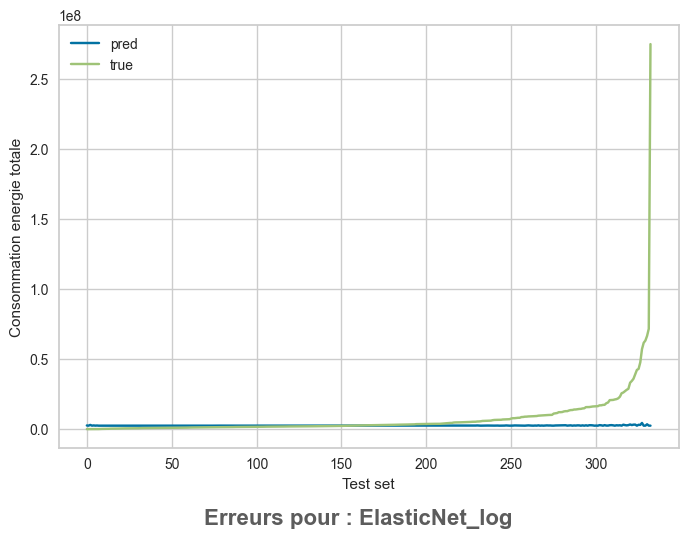

In [166]:
affiche_erreur(y_test_log,y_pred_l_log,'ElasticNet_log')

### <span style='color'>5.3. Modeles Non-Lineaires </span>

#### <span style='color'>5.3.1 KNeighborsRegressor</span>

**Cible SiteEnergyUseWN non transformée**

In [167]:
from sklearn.neighbors import KNeighborsRegressor
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train, X_test, y_train,y_test,df_resultats,'KNeighborsRegressor')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


**Cible SiteEnergyUseWN  transformée**

In [168]:
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'KNeighborsRegressorLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


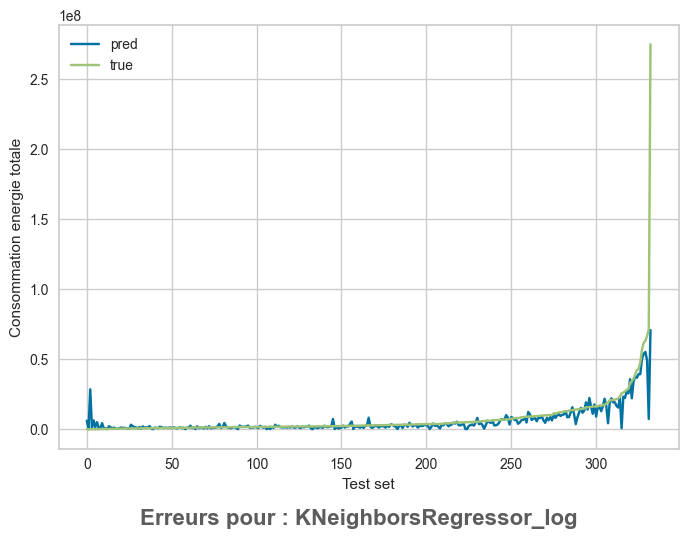

In [169]:
affiche_erreur(y_test_log,y_pred,'KNeighborsRegressor_log')

#### <span style='color'>5.3.2. XGBRegressor </span>

**Cible SiteEnergyUseWN non transformée**

In [170]:
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'XGBRegressor')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


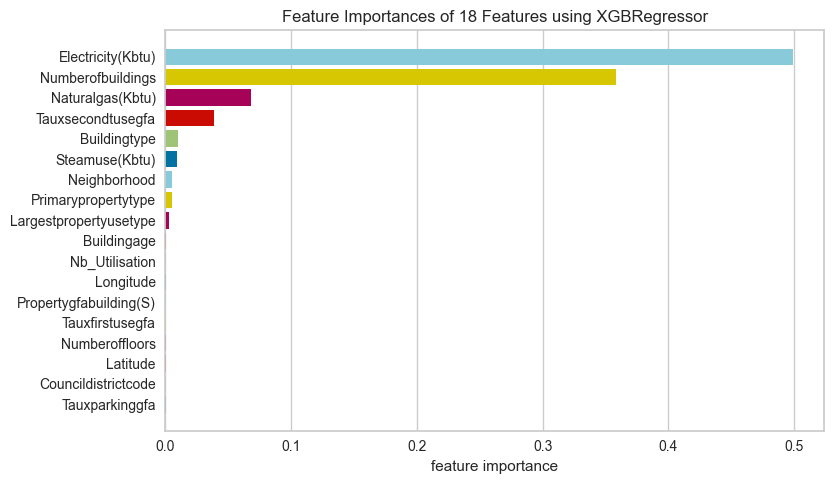

<Axes: title={'center': 'Feature Importances of 18 Features using XGBRegressor'}, xlabel='feature importance'>

In [171]:
xgb_reg =XGBRegressor(random_state=21)
xgb_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible SiteEnergyUseWN transformée**

In [172]:
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'XGBRegressorLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


#### <span style='color'>5.3.3. GradientBoosting </span>

**Cible SiteEnergyUseWN non transformée**

In [173]:
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,' GradientBoosting')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


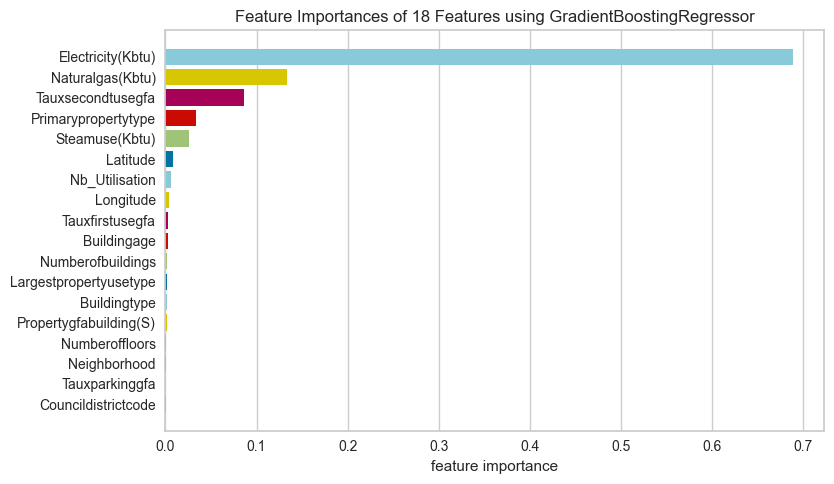

<Axes: title={'center': 'Feature Importances of 18 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [174]:
gra_reg =GradientBoostingRegressor(random_state=21, verbose=False)
gra_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(gra_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible SiteEnergyUseWN transformée**

In [175]:
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'GradientBoostingLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


#### <span style='color'>5.3.4. Random Forest </span>

**Cible SiteEnergyUseWN non transformée**

In [176]:
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'RandomForest')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


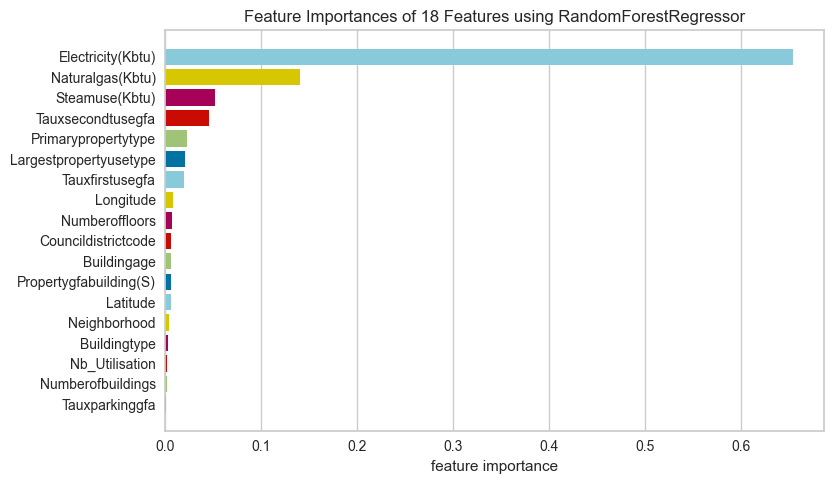

<Axes: title={'center': 'Feature Importances of 18 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [177]:
ran_reg =RandomForestRegressor(random_state=21)
ran_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ran_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible SiteEnergyUseWN transformée**

In [178]:
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'RandomForestLog')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


**Visualisation des conditions de décision de Random Forest**

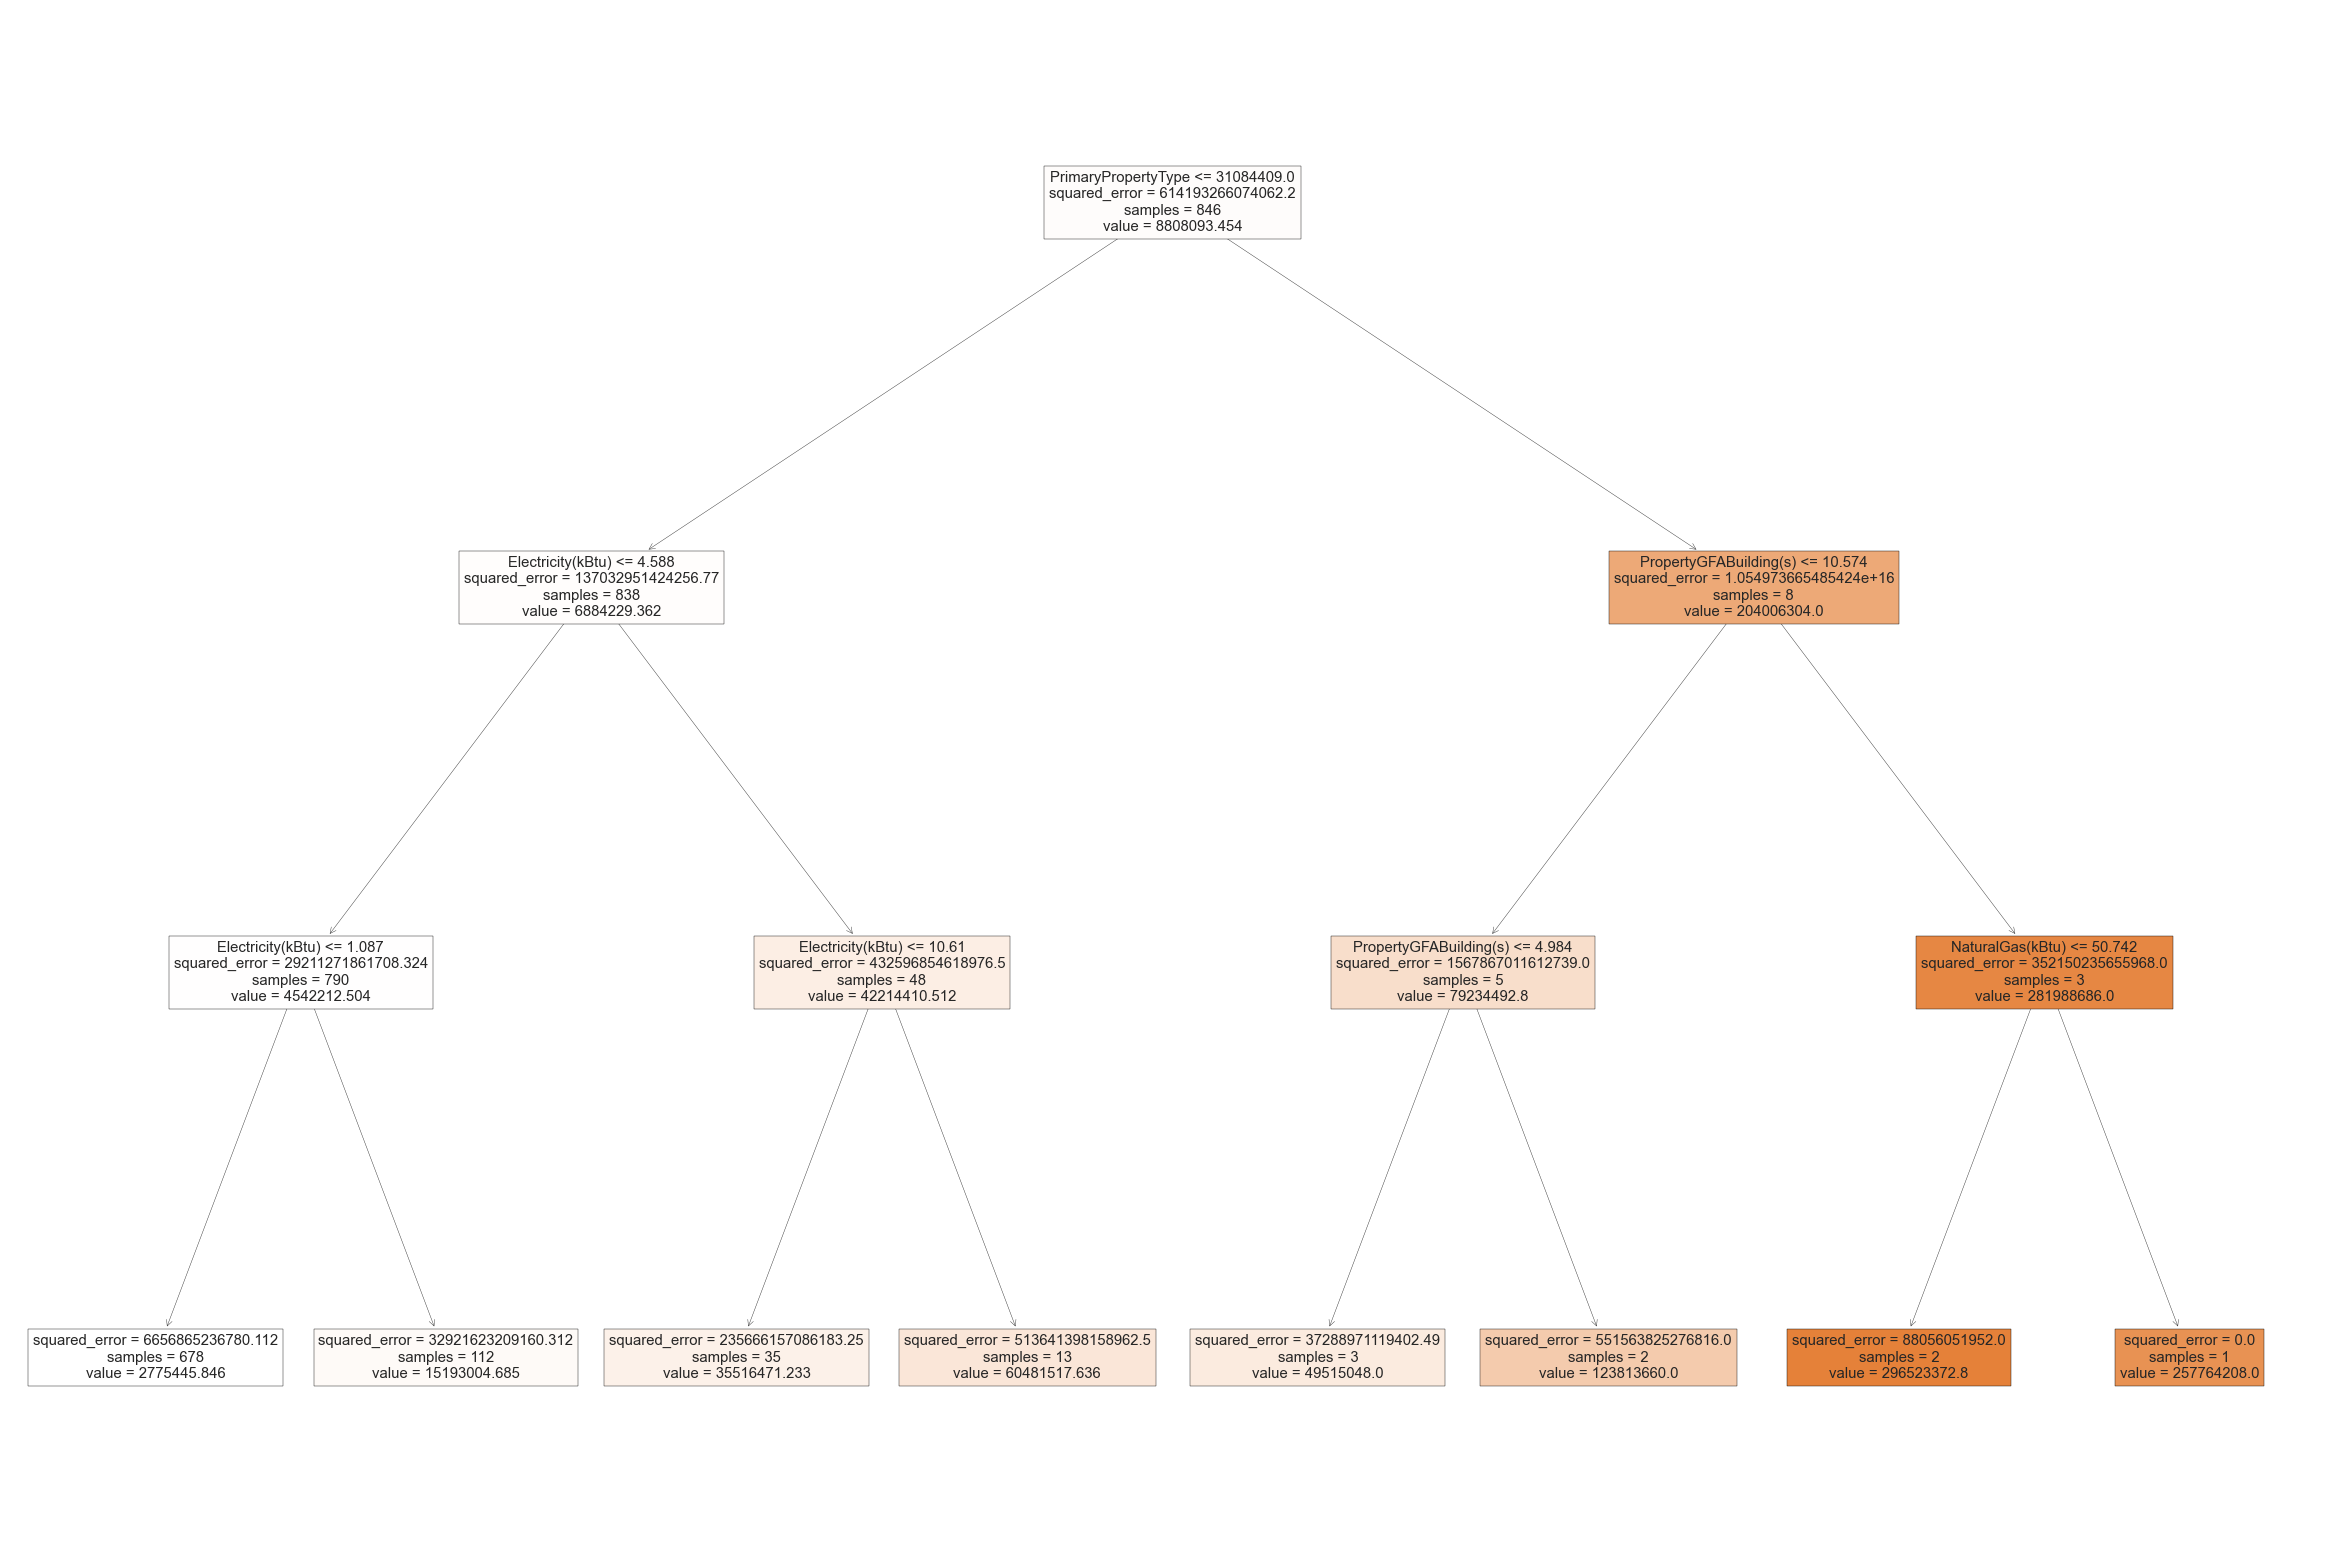

In [180]:
rf_visu = RandomForestRegressor(n_estimators=100, max_depth=3,
                                random_state=21)
# Entraînement du modèle
rf_visu.fit(X_train, y_train)
# Prédictions avec le test set
y_pred = rf_visu.predict(X_test)

# Visualisation avec tree de sklearn
plt.figure(figsize=(30, 20))
vis = tree.plot_tree(rf_visu.estimators_[0], feature_names = X_train.columns.to_list() ,filled=True)
plt.show()

#### <span style='color'>5.3.5. CatBoostRegressor</span>

**Cible SiteEnergyUseWN non transformée**

In [181]:
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,'CatBoostRegressor')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


**Cible SiteEnergyUseWN transformée**

In [182]:
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'CatBoostRegressor_log')


,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,DummyRegressor_mean,-0.002234,3.226827e+14,1.796337e+07,7.961975e+06,7.961975e+06,-inf,0.001973,-0.014239,0.016372,5.265686e+14,0.000000,0.000000,5.261023e+14
1,DummyRegressor_meanlog,-0.000844,1.154697e+00,1.074569e+00,5.462144e-01,5.462144e-01,-inf,0.001144,-0.008290,0.007637,8.860191e-01,0.000000,0.000000,8.845235e-01
2,DummyRegressor_median,-0.068833,3.441250e+14,1.855061e+07,6.010304e+06,6.010304e+06,-inf,0.001425,-0.104309,0.046024,5.568772e+14,-0.059283,0.005984,5.569644e+14
3,DummyRegressor_medianlog,-0.002474,1.156578e+00,1.075443e+00,5.456973e-01,5.456973e-01,-inf,0.001602,-0.006541,0.007419,8.852095e-01,-0.000657,0.000317,8.851203e-01
4,Lasso,0.813114,6.017057e+13,7.756969e+06,2.911680e+06,2.911680e+06,-inf,0.030212,0.581370,0.675551,4.564482e+14,0.947914,0.016221,2.805358e+13
5,Lasso_log,0.008236,1.144222e+00,1.069683e+00,5.381028e-01,5.381028e-01,-inf,0.024967,0.011320,0.044914,8.828900e-01,0.026898,0.002609,8.607116e-01
6,LinearRegression,0.813114,6.017049e+13,7.756964e+06,2.911680e+06,2.911680e+06,-inf,0.011141,0.581370,0.675552,4.564485e+14,0.947914,0.016221,2.805358e+13
7,LinearRegressionLog,0.212338,9.087439e-01,9.532806e-01,4.391554e-01,4.391554e-01,-inf,0.025898,0.050988,0.545138,1.020111e+00,0.256323,0.016219,6.585608e-01
8,ElasticNet,0.699048,9.689541e+13,9.843547e+06,3.152618e+06,3.152618e+06,-inf,0.029962,0.629711,0.566788,3.972100e+14,0.944607,0.016309,2.979031e+13
9,ElasticNetLog,0.016628,1.134539e+00,1.065148e+00,5.310832e-01,5.310832e-01,-inf,0.026365,-0.028435,0.234924,9.804271e-01,0.058377,0.029328,8.340645e-01


### <span style='color'>5.4. Bilan - Algorithmes les plus performants </span>

In [184]:
comparatif = df_resultats.sort_values(
    by=['MSE', 'R2', 'Durée','RMSE'])
comparatif.style.hide()

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
GradientBoostingLog,0.560088,0.507537,0.712416,0.199849,0.199849,-inf,0.555769,0.552387,0.215114,0.448415,0.937796,0.013591,0.055511
RandomForestLog,0.543401,0.526789,0.725802,0.164686,0.164686,-inf,2.284299,0.521722,0.284616,0.484634,0.921476,0.008565,0.069593
XGBRegressorLog,0.488215,0.590459,0.768413,0.196762,0.196762,-inf,0.562517,0.495372,0.317290,0.464663,0.999912,0.000020,0.000078
CatBoostRegressor_log,0.242668,0.873751,0.934747,0.242177,0.242177,-inf,2.857576,0.588850,0.290842,0.407381,0.995803,0.001050,0.003757
LinearRegressionLog,0.212338,0.908744,0.953281,0.439155,0.439155,-inf,0.025898,0.050988,0.545138,1.020111,0.256323,0.016219,0.658561
KNeighborsRegressorLog,0.124500,1.010085,1.005030,0.362802,0.362802,-inf,0.017675,0.230063,0.177624,0.707126,0.471662,0.024514,0.468350
ElasticNetLog,0.016628,1.134539,1.065148,0.531083,0.531083,-inf,0.026365,-0.028435,0.234924,0.980427,0.058377,0.029328,0.834064
Lasso_log,0.008236,1.144222,1.069683,0.538103,0.538103,-inf,0.024967,0.011320,0.044914,0.882890,0.026898,0.002609,0.860712
DummyRegressor_meanlog,-0.000844,1.154697,1.074569,0.546214,0.546214,-inf,0.001144,-0.008290,0.007637,0.886019,0.000000,0.000000,0.884524
DummyRegressor_medianlog,-0.002474,1.156578,1.075443,0.545697,0.545697,-inf,0.001602,-0.006541,0.007419,0.885210,-0.000657,0.000317,0.885120


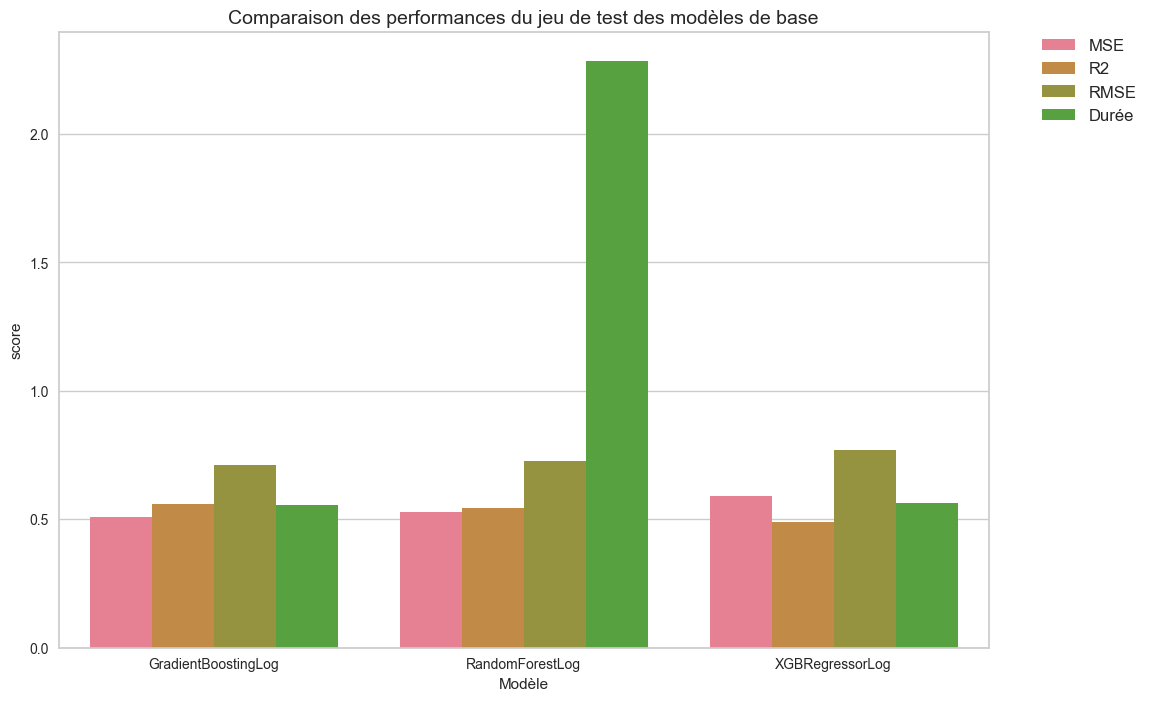

In [187]:
# Comparaison visuelle des 4 algorithmes les plus performants
df_compar = comparatif.head(3)
comparaison_score_melt = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=[
                                 'MSE', 'R2', 'RMSE', 'Durée'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'],
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'], palette= sns.color_palette("husl", 9))
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
fic = 'Comparaison des performances du jeu de test des modèles de base.jpg'
plt.savefig(fic)
plt.show()

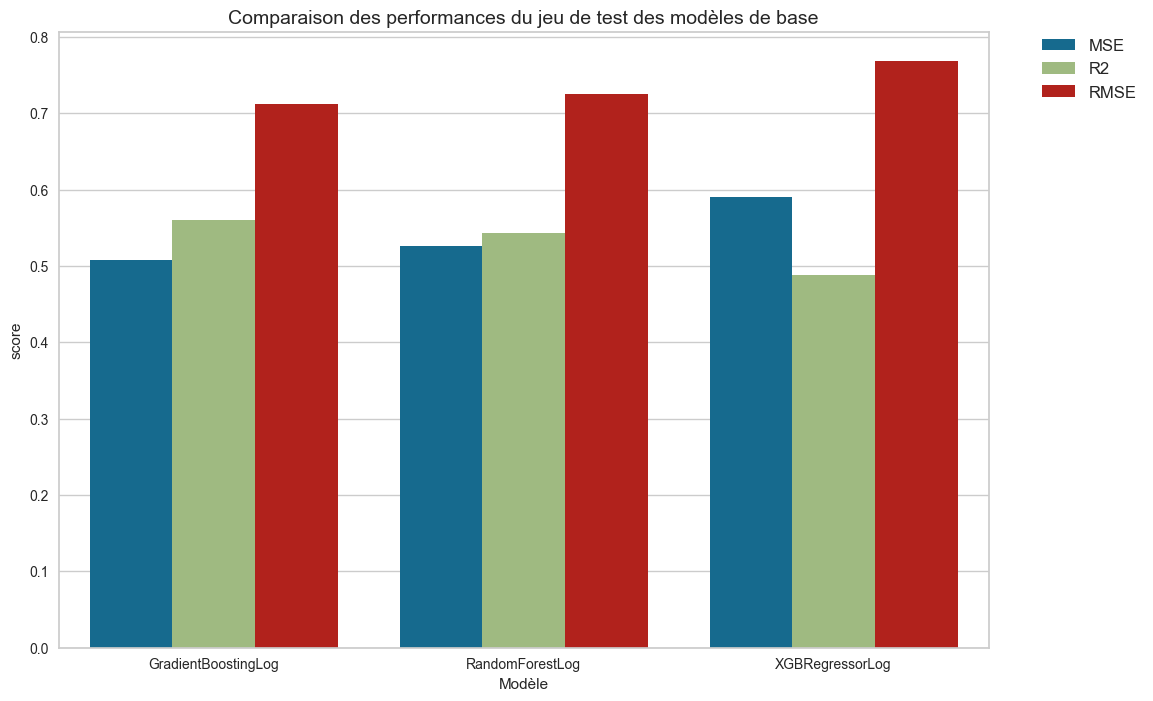

In [188]:
# Comparaison visuelle des 4 algorithmes les plus performants sans la durée
comparaison_score_melt = pd.melt(df_compar, id_vars=[
                                 'Modèle'], value_name='score', value_vars=['MSE', 'R2', 'RMSE'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'], palette=sns.color_palette(),
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'])
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
fic = 'Comparaison des performances du jeu de test des modèles de base bis.jpg'
plt.savefig(fic)
plt.show()

**Bilan** :  
- Les modèles de base (non optimisés) les plus performants sont en léger over-fitting sur le jeu d'entraînement sauf GradientBoostingRegressor.
- Le modèle GradientBoostingRegressor détient la MSE la plus faible et le meilleur score R2.
- RandomForest et XGBRegressor ont de bonnes performances mais ont des temps d'exécution beaucoup plus longs que GradientBoostRegressor (2 fois plus pour XGBRegressor et plus de 5 fois plus pour RandomForest).

- Nous allons tenter d'optimiser ces 3 algorithmes.

## <span style='background:#33B5FF'>6. Optimisation des algorithmes les plus performants </span>

### <span color=''>6.1 Optimisation des parametres pour RandomForest </span>

In [75]:
#dataframe pour stocker les resultats 
df_resultats_ran = pd.DataFrame(dtype = 'object')

In [76]:
df_resultats_ran, y_pred_log = Regression(RandomForestRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_ran,'RandomForest_log')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,RandomForest_log,0.543401,0.526789,0.725802,0.164686,0.164686,-inf,1.700377,0.521722,0.284616,0.484634,0.921476,0.008565,0.069593


In [65]:
# Paramètres de base de l'algorithme KneighborsRegressor
print('Les paramètres par défaut:\n')
etr_param = RandomForestRegressor(random_state=21)
pprint(etr_param.get_params())

Les paramètres par défaut:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}


**GridSearchCV**

In [78]:

# Create the parameter grid based on the results of random search 
params_grid = {
    'bootstrap': [True],
    'max_depth': [100 , 110, None ],
    'max_features': ["log2"],
    'min_samples_leaf': [1,4,5],
    'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 250]
}             
print( params_grid)
grid = GridSearchCV(RandomForestRegressor(random_state=21),params_grid, cv=10)
grid.fit(X_train_log, y_train_log)

print(grid.best_score_,grid.best_params_)
df_resultats_ran, y_pred = Regression(grid.best_estimator_, X_train_log, X_test_log, y_train_log, y_test_log,df_resultats_ran,'RandomForest_log_optimisé_GSCV')

{'bootstrap': [True], 'max_depth': [100, 110, None], 'max_features': ['log2'], 'min_samples_leaf': [1, 4, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [100, 200, 250]}
0.5694650180164506 {'bootstrap': True, 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,RandomForest_log,0.543401,0.526789,0.725802,0.164686,0.164686,-inf,1.700377,0.521722,0.284616,0.484634,0.921476,0.008565,0.069593
1,RandomForest_log_optimisé_GSCV,0.375918,0.720018,0.848539,0.241894,0.241894,-inf,0.355410,0.569465,0.202699,0.455018,0.690288,0.015016,0.274476


**RandomizedSearchCV**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
params_grid = {
    'bootstrap': [True],
    'max_depth': [100 , 110, None ],
    'max_features': [None],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [2,3,4],
    'n_estimators': [150, 200, 250]
}
print( params_grid)
grid = RandomizedSearchCV(RandomForestRegressor(),params_grid, cv=10)
grid.fit(X_train_log, y_train_log)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
df_resultats_ran, y_pred = Regression(grid.best_estimator_, X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_ran,'RandomForest_log_optimisé_Random')

{'bootstrap': [True], 'max_depth': [100, 110, None], 'max_features': [None], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [150, 200, 250]}
0.5988455607857055 {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 100, 'bootstrap': True}


,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,RandomForest_log,0.543401,0.526789,0.725802,0.164686,0.164686,-inf,1.700377,0.521722,0.284616,0.484634,0.921476,0.008565,0.069593
1,RandomForest_log_optimisé_GSCV,0.375918,0.720018,0.848539,0.241894,0.241894,-inf,0.355410,0.569465,0.202699,0.455018,0.690288,0.015016,0.274476
2,RandomForest_log_optimisé_Random,0.514890,0.559683,0.748120,0.180956,0.180956,-inf,1.950016,0.594787,0.262954,0.453474,0.673069,0.016600,0.289782


### <span color=''>6.2 Optimisation des parametres pour GradientBoostingRegressor </span>

In [93]:
#dataframe pour stocker les resultats 
df_resultats_gb = pd.DataFrame(dtype = 'object')

In [94]:
df_resultats_gb, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_gb,'GradientBoosting_Log')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,GradientBoosting_Log,0.560088,0.507537,0.712416,0.199849,0.199849,-inf,0.54133,0.552387,0.215114,0.448415,0.937796,0.013591,0.055511


In [95]:
# Paramètres de base de l'algorithme CatBoostRegressor
print('Les paramètres par défaut:\n')
etr_param =GradientBoostingRegressor(random_state=21, verbose=False) 
pprint(etr_param.get_params())

Les paramètres par défaut:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 21,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [96]:
gb = GradientBoostingRegressor(n_estimators=107,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        max_depth=5
                                         )
df_resultats_gb, y_pred = Regression(gb, X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_gb,'GradientBoosting_Log_optimisé')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,GradientBoosting_Log,0.560088,0.507537,0.712416,0.199849,0.199849,-inf,0.541330,0.552387,0.215114,0.448415,0.937796,0.013591,0.055511
1,GradientBoosting_Log_optimisé,0.581736,0.482561,0.694666,0.169330,0.169330,-inf,0.974997,0.474217,0.319898,0.500249,0.998398,0.000397,0.001433


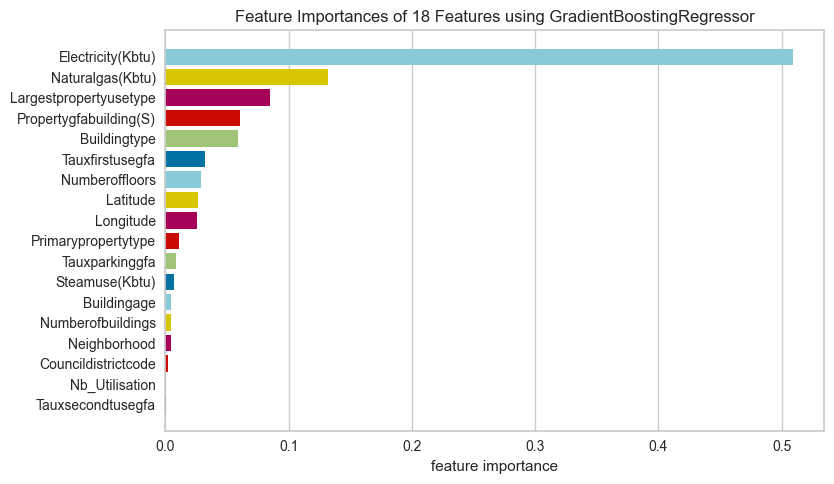

<Axes: title={'center': 'Feature Importances of 18 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [97]:
gra_reg = gb
gra_reg.fit(X_train_log,y_train_log)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(gra_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train_log, y_train_log)
viz.show()

### <span color=''>6.3 Optimisation des parametres pour XGBRegressor </span>

In [114]:
#dataframe pour stocker les resultats 
df_resultats_xgb = pd.DataFrame(dtype = 'object')

In [115]:
df_resultats_xgb, y_pred = Regression(XGBRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_xgb,'XGBRegressor_Log')

,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,XGBRegressor_Log,0.488215,0.590459,0.768413,0.196762,0.196762,-inf,0.810768,0.495372,0.31729,0.464663,0.999912,0.00002,0.000078


In [116]:
# Paramètres de base de l'algorithme Lasso
print('Les paramètres par défaut:\n')
etr_param = XGBRegressor(random_state=21)
pprint(etr_param.get_params())

Les paramètres par défaut:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': 21,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


**GridSearchCV**

In [117]:
params_grid = {'learning_rate': [0.01],
 'n_estimators' : [8000],
 'max_depth' :[4],
 'min_child_weight':[6],
 'gamma' : [0],
 'subsample': [0.8],
 'colsample_bytree': [0.8],
 'reg_alpha': [0.005],
 'nthread':[4],
 'scale_pos_weight':[1],
 'seed' : [21]}
print( params_grid)
grid = GridSearchCV(XGBRegressor(),params_grid, cv=10)
grid.fit(X_train_log, y_train_log)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
df_resultats_xgb, y_pred = Regression(grid.best_estimator_, X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_xgb,'XGBRegressor_Log_optimisé_Grid')

{'learning_rate': [0.01], 'n_estimators': [8000], 'max_depth': [4], 'min_child_weight': [6], 'gamma': [0], 'subsample': [0.8], 'colsample_bytree': [0.8], 'reg_alpha': [0.005], 'nthread': [4], 'scale_pos_weight': [1], 'seed': [21]}
0.5807693958680202 {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 8000, 'nthread': 4, 'reg_alpha': 0.005, 'scale_pos_weight': 1, 'seed': 21, 'subsample': 0.8}


,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,XGBRegressor_Log,0.488215,0.590459,0.768413,0.196762,0.196762,-inf,0.810768,0.495372,0.317290,0.464663,0.999912,0.000020,0.000078
1,XGBRegressor_Log_optimisé_Grid,0.301460,0.805922,0.897732,0.282318,0.282318,-inf,11.617204,0.580769,0.229235,0.401560,0.997664,0.000439,0.002081


**RandomizedSearchCV**

In [120]:
params_grid = {'learning_rate': [0.01],
 'n_estimators' : [8000],
 'max_depth' :[4],
 'min_child_weight':[6],
 'gamma' : [0],
 'subsample': [0.8],
 'colsample_bytree': [0.8],
 'reg_alpha': [0.005],
 'nthread':[4],
 'scale_pos_weight':[1],
 'seed' : [21]}
print( params_grid)
grid = RandomizedSearchCV(XGBRegressor(),params_grid, cv=10)
grid.fit(X_train_log, y_train_log)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
df_resultats_xgb, y_pred = Regression(grid.best_estimator_, X_train_log, X_test_log, y_train_log,y_test_log,df_resultats_xgb,'XGBRegressor_Log_optimisé_Random')

{'learning_rate': [0.01], 'n_estimators': [8000], 'max_depth': [4], 'min_child_weight': [6], 'gamma': [0], 'subsample': [0.8], 'colsample_bytree': [0.8], 'reg_alpha': [0.005], 'nthread': [4], 'scale_pos_weight': [1], 'seed': [21]}
0.5807693958680202 {'subsample': 0.8, 'seed': 21, 'scale_pos_weight': 1, 'reg_alpha': 0.005, 'nthread': 4, 'n_estimators': 8000, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


,Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
0,XGBRegressor_Log,0.488215,0.590459,0.768413,0.196762,0.196762,-inf,0.810768,0.495372,0.317290,0.464663,0.999912,0.000020,0.000078
1,XGBRegressor_Log_optimisé_Grid,0.301460,0.805922,0.897732,0.282318,0.282318,-inf,11.617204,0.580769,0.229235,0.401560,0.997664,0.000439,0.002081
2,XGBRegressor_Log_optimisé_Random,0.301460,0.805922,0.897732,0.282318,0.282318,-inf,11.474053,0.580769,0.229235,0.401560,0.997664,0.000439,0.002081
3,XGBRegressor_Log_optimisé_Random,0.301460,0.805922,0.897732,0.282318,0.282318,-inf,20.918803,0.580769,0.229235,0.401560,0.997664,0.000439,0.002081
4,XGBRegressor_Log_optimisé_Random,0.301460,0.805922,0.897732,0.282318,0.282318,-inf,10.936198,0.580769,0.229235,0.401560,0.997664,0.000439,0.002081


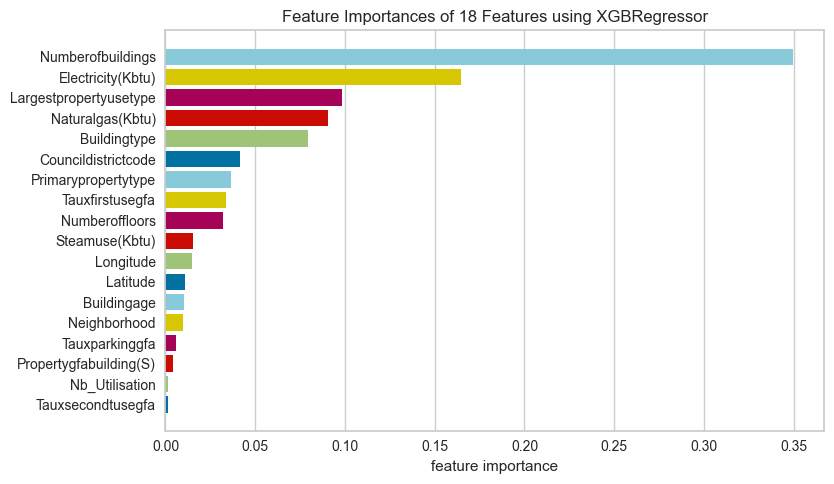

<Axes: title={'center': 'Feature Importances of 18 Features using XGBRegressor'}, xlabel='feature importance'>

In [121]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_log,y_train_log)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train_log, y_train_log)
viz.show()